In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys
import tensorflow as tf
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm

In [50]:
# 예측할 종목은 한양증권(001750) 입니다
# 기간은 16-02-04 ~ 21-02-04

df = pd.read_csv('C:\Jupyter_Project\HY.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-04,6930,6980,6890,6930,5837.953613,19034
1,2016-02-05,6990,7190,6980,7040,5930.619629,23731
2,2016-02-11,6880,6880,6720,6800,5728.439941,18254
3,2016-02-12,6740,6740,6450,6600,5559.956055,43774
4,2016-02-15,6670,6800,6630,6800,5728.439941,26119


In [51]:
# close coloum 만 예측을 위해서 뽑아낸다

df1=df.reset_index()['Close']

df1

0        6930
1        7040
2        6800
3        6600
4        6800
        ...  
1216     9260
1217     9380
1218     9700
1219     9990
1220    10150
Name: Close, Length: 1221, dtype: int64

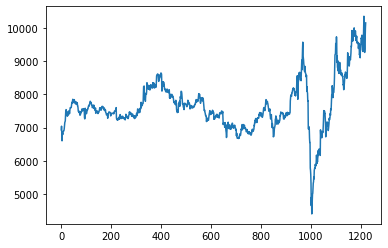

In [52]:
#plotting the close data 
import matplotlib.pyplot as plt
plt.plot(df1)

In [53]:
## preprocessing the data
import numpy as np

In [54]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [55]:
print(df1)

[[0.42521008]
 [0.44369748]
 [0.40336134]
 ...
 [0.8907563 ]
 [0.9394958 ]
 [0.96638655]]


In [56]:
len(df1)

1221

In [57]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [58]:
training_size

976

In [59]:
test_size

245

In [60]:
train_data

array([[0.42521008],
       [0.44369748],
       [0.40336134],
       [0.3697479 ],
       [0.40336134],
       [0.40672269],
       [0.40168067],
       [0.41680672],
       [0.41680672],
       [0.42016807],
       [0.42016807],
       [0.42352941],
       [0.43361345],
       [0.4487395 ],
       [0.46218487],
       [0.46722689],
       [0.47058824],
       [0.49411765],
       [0.5210084 ],
       [0.52773109],
       [0.52605042],
       [0.51260504],
       [0.51260504],
       [0.51260504],
       [0.49411765],
       [0.49579832],
       [0.51596639],
       [0.5092437 ],
       [0.50084034],
       [0.50252101],
       [0.5210084 ],
       [0.5210084 ],
       [0.51764706],
       [0.50756303],
       [0.52268908],
       [0.53109244],
       [0.53781513],
       [0.53781513],
       [0.53613445],
       [0.53781513],
       [0.5394958 ],
       [0.5512605 ],
       [0.55966387],
       [0.56470588],
       [0.56134454],
       [0.57310924],
       [0.57983193],
       [0.578

In [61]:
test_data

array([[0.71932773],
       [0.74621849],
       [0.7210084 ],
       [0.71092437],
       [0.7092437 ],
       [0.69411765],
       [0.69411765],
       [0.70084034],
       [0.62016807],
       [0.64369748],
       [0.61848739],
       [0.61008403],
       [0.57142857],
       [0.57310924],
       [0.44033613],
       [0.42857143],
       [0.44201681],
       [0.42857143],
       [0.42857143],
       [0.38319328],
       [0.36134454],
       [0.36134454],
       [0.23193277],
       [0.22016807],
       [0.19831933],
       [0.1512605 ],
       [0.04201681],
       [0.08571429],
       [0.        ],
       [0.03697479],
       [0.08823529],
       [0.10084034],
       [0.10420168],
       [0.13109244],
       [0.15630252],
       [0.16134454],
       [0.18655462],
       [0.17647059],
       [0.22016807],
       [0.22857143],
       [0.23361345],
       [0.2302521 ],
       [0.25042017],
       [0.24369748],
       [0.24537815],
       [0.24369748],
       [0.26890756],
       [0.297

In [62]:
# convert an array of values into a dataset matrix 
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [63]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
# time_step : 100일 동안 학습하고 그 다음 날 

time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [64]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(955, 20)
(955,)
(224, 20)
(224,)


(None, None)

In [65]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [66]:
X_train.shape

(955, 20, 1)

In [68]:
X_test.shape

(224, 20, 1)

In [69]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 100)          60400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 151,301
Trainable params: 151,301
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
30/30 [==============================] - 13s 104ms/step - loss: 0.0828 - val_loss: 0.0300
Epoch 2/100
30/30 [==============================] - 1s 31ms/step - loss: 0.0028 - val_loss: 0.0174
Epoch 3/100
30/30 [==============================] - 1s 38ms/step - loss: 0.0014 - val_loss: 0.0164
Epoch 4/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0013 - val_loss: 0.0139
Epoch 5/100
30/30 [==============================] - 1s 35ms/step - loss: 0.0013 - val_loss: 0.0114
Epoch 6/100
30/30 [==============================] - 1s 39ms/step - loss: 0.0012 - val_loss: 0.0111
Epoch 7/100
30/30 [==============================] - 1s 35ms/step - loss: 9.7776e-04 - val_loss: 0.0109
Epoch 8/100
30/30 [==============================] - 1s 38ms/step - loss: 9.4220e-04 - val_loss: 0.0111
Epoch 9/100
30/30 [==============================] - 1s 36ms/step - loss: 9.9413e-04 - val_loss: 0.0101
Epoch 10/100
30/30 [==============================] - 1s 37ms/step - loss: 8.8839e-04 

Epoch 70/100
30/30 [==============================] - 1s 37ms/step - loss: 3.6374e-04 - val_loss: 0.0018
Epoch 71/100
30/30 [==============================] - 1s 34ms/step - loss: 2.8122e-04 - val_loss: 0.0017
Epoch 72/100
30/30 [==============================] - 1s 34ms/step - loss: 2.3144e-04 - val_loss: 0.0020
Epoch 73/100
30/30 [==============================] - 1s 38ms/step - loss: 3.9066e-04 - val_loss: 0.0017e-0
Epoch 74/100
30/30 [==============================] - 1s 34ms/step - loss: 2.2902e-04 - val_loss: 0.0017
Epoch 75/100
30/30 [==============================] - 1s 34ms/step - loss: 3.3425e-04 - val_loss: 0.0017
Epoch 76/100
30/30 [==============================] - 1s 34ms/step - loss: 2.4324e-04 - val_loss: 0.0016
Epoch 77/100
30/30 [==============================] - 1s 37ms/step - loss: 2.3389e-04 - val_loss: 0.0015
Epoch 78/100
30/30 [==============================] - 1s 35ms/step - loss: 2.5996e-04 - val_loss: 0.0015
Epoch 79/100
30/30 [==============================] 

In [32]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
yt=math.sqrt(mean_squared_error(y_train,train_predict))
print(yt)
### Test Data RMSE
yte=math.sqrt(mean_squared_error(ytest,test_predict))
print(yte)

7593.7782782925615
8208.077412663193


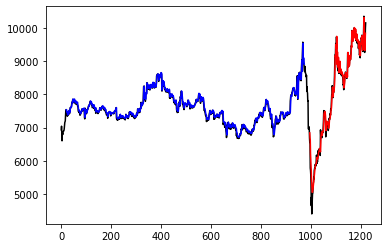

In [47]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), color = 'black')
plt.plot(trainPredictPlot, color = 'blue')
plt.plot(testPredictPlot, color = 'red')
plt.show()

In [43]:
scaler.inverse_transform(df1)

array([[ 6930.],
       [ 7040.],
       [ 6800.],
       ...,
       [ 9700.],
       [ 9990.],
       [10150.]])

In [36]:
#predict the next 30 days as len of test data is 1833 to calucate the output we will take last 100 days data 
x_input=test_data[225:].reshape(1,-1)
x_input.shape

(1, 20)

In [37]:
#convert the data into list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
# demonstrate prediction for next day
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<1):
    
    if(len(temp_input)>20):
        #print(temp_input)
        #leave last day
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
      #this will run 
      # first reshape the data 
        x_input = x_input.reshape((1, n_steps,1))
        #predict the valve and save in yhat
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        # add to this list as the lenth is increased by 1 loop will go in if clause
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9659398]
21
[[0.9659398198127747]]


In [40]:
#Prediction for 18 January 2021
a = scaler.inverse_transform(lst_output)
a

array([[10147.34192789]])

In [41]:
## saving the output into a csv
prediction = a[[0]]
print('Predicted value for next day=',prediction)
b = df['Close'].iloc[-1]
print('last close price=',b)
percentage = ((prediction-b)/b)*100
print('percentage change should be =', percentage.round(3),'%' )

Predicted value for next day= [[10147.34192789]]
last close price= 10150
percentage change should be = [[-0.026]] %
